In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.svm import SVC

# Hard margin SVM (linear kernel)
svm_hard = SVC(kernel='linear', C=1e6)
svm_hard.fit(X_train_scaled, y_train)

# Soft margin SVM (linear kernel)
svm_soft = SVC(kernel='linear', C=1.0)
svm_soft.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [14]:
# Total number of support vectors for hard margin
total_sv_hard = svm_hard.support_vectors_.shape[0]

# Total number of support vectors for soft margin
total_sv_soft = svm_soft.support_vectors_.shape[0]

print("Total number of support vectors for hard margin:", total_sv_hard)
print("Total number of support vectors for soft margin:", total_sv_soft)

Total number of support vectors for hard margin: 13
Total number of support vectors for soft margin: 36


In [5]:
# Hyperplane coefficients
hard_margin_coeffs = svm_hard.coef_
soft_margin_coeffs = svm_soft.coef_

# Type of kernel used
kernel_used = svm_soft.kernel

print("Hyperplane coefficients for hard margin:", hard_margin_coeffs)
print("Hyperplane coefficients for soft margin:", soft_margin_coeffs)
print("Type of kernel used:", kernel_used)

Hyperplane coefficients for hard margin: [[ -0.43064897   0.31645308  -0.86022283  -0.91160382]
 [ -0.06229971   0.13237344  -0.53855004  -0.54215635]
 [  0.83564538   2.46504988  -9.63460536 -10.56793604]]
Hyperplane coefficients for soft margin: [[-0.43064897  0.31645308 -0.86022283 -0.91160382]
 [-0.06229971  0.13237344 -0.53855004 -0.54215635]
 [ 0.23209633  0.73896232 -2.37838482 -2.126034  ]]
Type of kernel used: linear


In [16]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    print("\nKernel:", kernel)
    svm = SVC(kernel=kernel)
    svm.fit(X_train_scaled, y_train)
    accuracy = svm.score(X_test_scaled, y_test)
    print("Prediction accuracy:", accuracy)
    misclassified = np.where(svm.predict(X_test_scaled) != y_test)[0]
    print("Misclassified instances:", misclassified)


Kernel: linear
Prediction accuracy: 0.9777777777777777
Misclassified instances: [8]

Kernel: poly
Prediction accuracy: 0.9555555555555556
Misclassified instances: [21 40]

Kernel: rbf
Prediction accuracy: 1.0
Misclassified instances: []

Kernel: sigmoid
Prediction accuracy: 0.8888888888888888
Misclassified instances: [ 4 15 24 36 42]


In [7]:
print("\nPrediction accuracy for hard margin:", svm_hard.score(X_test_scaled, y_test))
print("Prediction accuracy for soft margin:", svm_soft.score(X_test_scaled, y_test))


Prediction accuracy for hard margin: 1.0
Prediction accuracy for soft margin: 0.9777777777777777


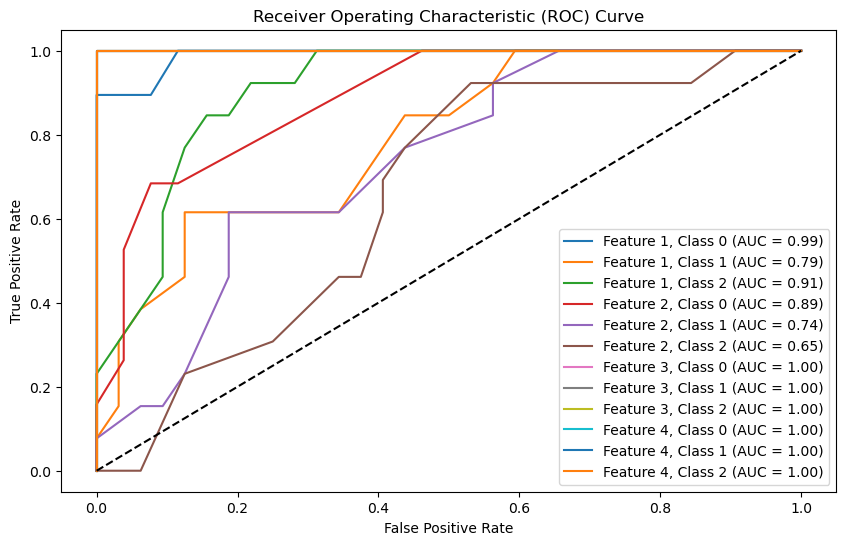

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

plt.figure(figsize=(10, 6))
for i in range(X_test_scaled.shape[1]):
    svm_soft.fit(X_train_scaled[:, i:i+1], y_train)
    y_pred_proba = svm_soft.decision_function(X_test_scaled[:, i:i+1])
    for class_label in np.unique(y_test):
        # One-vs-Rest strategy for multi-class classification
        y_test_binary = np.where(y_test == class_label, 1, 0)
        fpr, tpr, _ = roc_curve(y_test_binary, y_pred_proba[:, class_label])
        auc_score = roc_auc_score(y_test_binary, y_pred_proba[:, class_label])
        plt.plot(fpr, tpr, label=f'Feature {i+1}, Class {class_label} (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()